In [1]:
from collections import Counter, defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils.utils as utils

dataset_files = utils.get_cleaned_datafiles()

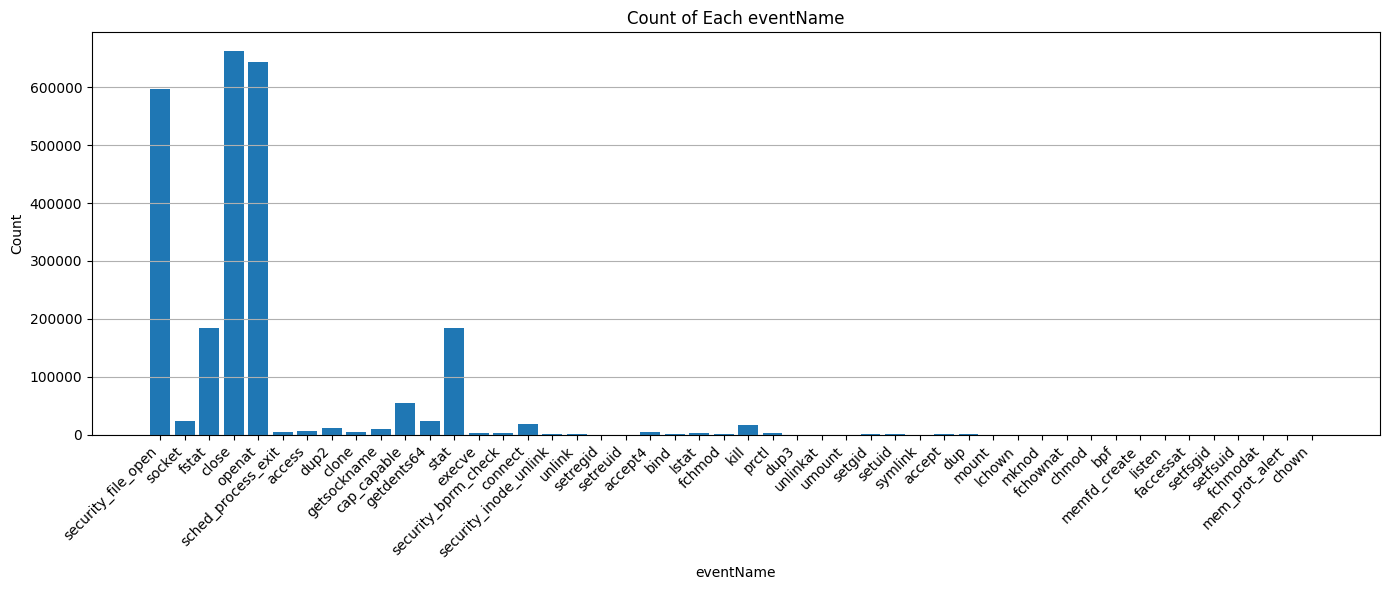

In [2]:
event_counter = Counter()

for file in dataset_files:
    df = pd.read_csv(file, usecols=["eventName"])
    event_counter.update(df["eventName"])

event_names = list(event_counter.keys())
event_counts = list(event_counter.values())

# Plot
plt.figure(figsize=(14, 6))
plt.bar(event_names, event_counts)
plt.title("Count of Each eventName")
plt.xlabel("eventName")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

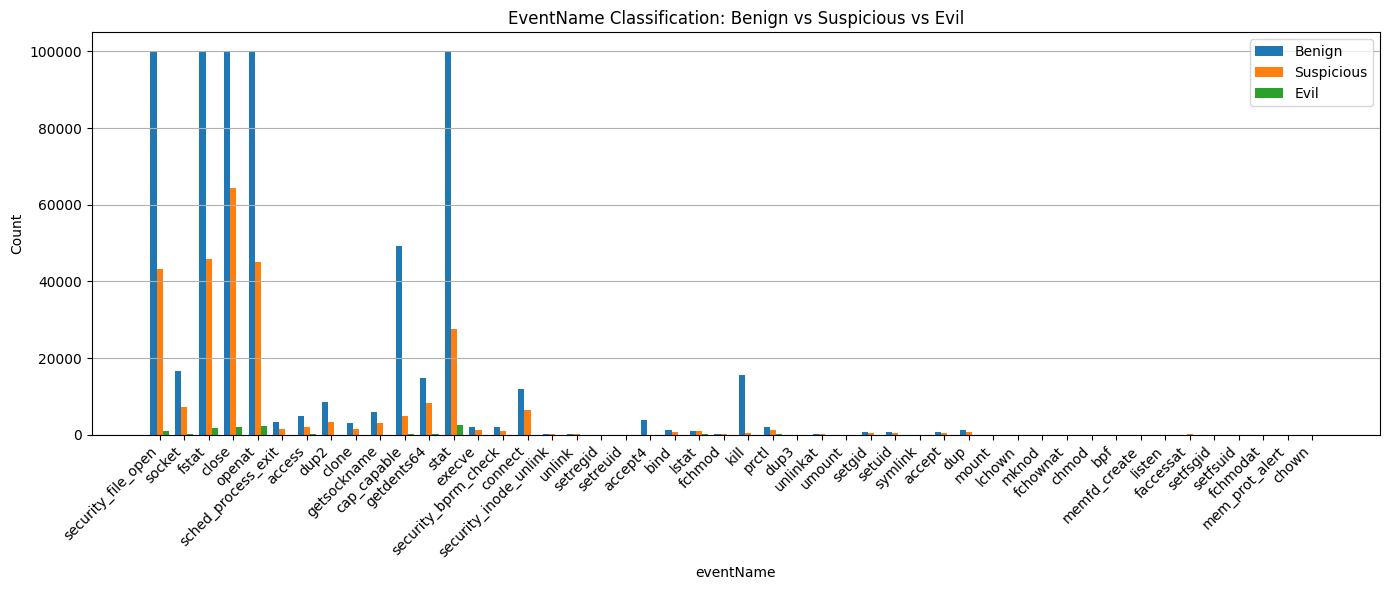

In [3]:
event_classification = defaultdict(lambda: {"benign": 0, "sus": 0, "evil": 0})

for file in dataset_files:
    df = pd.read_csv(file, usecols=["eventName", "label"])
    
    for _, row in df.iterrows():
        label = row["label"]
        if label == "benign":
            event_classification[row["eventName"]]["benign"] += 1
        elif label == "suspicious":
            event_classification[row["eventName"]]["sus"] += 1
        elif label == "evil":
            event_classification[row["eventName"]]["evil"] += 1
        else:
            raise ValueError(f"Unknown label: {label}")
        
# top limit 100.000 for each class
for event in event_classification:
    for label in event_classification[event]:
        if event_classification[event][label] > 100000:
            event_classification[event][label] = 100000

# Data
event_names = list(event_classification.keys())
benign_counts = [event_classification[e]["benign"] for e in event_names]
sus_counts = [event_classification[e]["sus"] for e in event_names]
evil_counts = [event_classification[e]["evil"] for e in event_names]

x = np.arange(len(event_names))  # bar positions
width = 0.25  # width of each bar

# Plot grouped bars
plt.figure(figsize=(14, 6))
plt.bar(x - width, benign_counts, width, label='Benign')
plt.bar(x,         sus_counts,   width, label='Suspicious')
plt.bar(x + width, evil_counts,  width, label='Evil')

# Labels and styling
plt.title("EventName Classification: Benign vs Suspicious vs Evil")
plt.xlabel("eventName")
plt.ylabel("Count")
plt.xticks(x, event_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

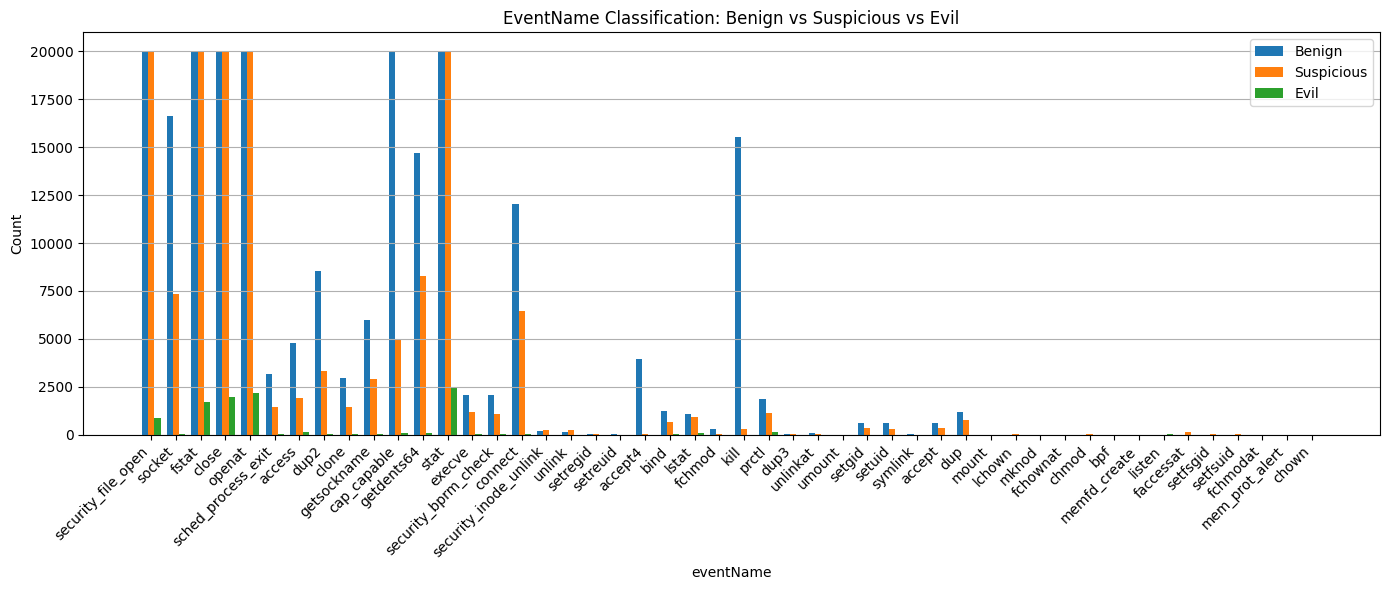

In [5]:
# top limit 100.000 for each class
for event in event_classification:
    for label in event_classification[event]:
        if event_classification[event][label] > 20000:
            event_classification[event][label] = 20000

# Data
event_names = list(event_classification.keys())
benign_counts = [event_classification[e]["benign"] for e in event_names]
sus_counts = [event_classification[e]["sus"] for e in event_names]
evil_counts = [event_classification[e]["evil"] for e in event_names]

x = np.arange(len(event_names))  # bar positions
width = 0.25  # width of each bar

# Plot grouped bars
plt.figure(figsize=(14, 6))
plt.bar(x - width, benign_counts, width, label='Benign')
plt.bar(x,         sus_counts,   width, label='Suspicious')
plt.bar(x + width, evil_counts,  width, label='Evil')

# Labels and styling
plt.title("EventName Classification: Benign vs Suspicious vs Evil")
plt.xlabel("eventName")
plt.ylabel("Count")
plt.xticks(x, event_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()